# Q4 Permutation Tests

In [48]:
import shap
from sklearn.model_selection import train_test_split
X,y = shap.datasets.adult() # Numerical version of data
X_display, y_display = shap.datasets.adult(display=True) # Human-readable data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, random_state=10)
model.fit(X_train.values, y_train)

GradientBoostingClassifier(random_state=10)

(a) Report the zero-one classification error (using a classification threshold of 0.5) and log-loss for both the train and test sets.

In [50]:
from sklearn.metrics import log_loss

# Predict probabilities for train and test sets
train_pred = model.predict_proba(X_train.values)[:, 1]
test_pred = model.predict_proba(X_test.values)[:, 1]

# Convert probabilities to binary predictions using a threshold of 0.5
train_pred_binary = (train_pred >= 0.5).astype(int)
test_pred_binary = (test_pred >= 0.5).astype(int)

# Calculate zero-one classification error
train_error = (train_pred_binary != y_train).mean()
test_error = (test_pred_binary != y_test).mean()

# Calculate log-loss
train_loss = log_loss(y_train, train_pred)
test_loss = log_loss(y_test, test_pred)

train_error, train_loss, test_error, test_loss

(0.1314880221130221,
 0.2877588985367273,
 0.13373253493013973,
 0.2940315282808109)

(b) Implement the permutation test approach for the trained model. For each feature, measure the change in the test set zero-one error after permuting the corresponding feature column. Visualize the importance values with a bar plot.

In [55]:
import numpy as np

def perm_test(clf, X_test, y_test):
    # Calculate the original zero-one error
    y_pred = clf.predict(X_test)
    original_error = (y_pred != y_test).mean()

    # Initialize an array to store the error changes
    error_changes = np.zeros(X_test.shape[1])

    # Permute each feature column and calculate the error change
    for i in range(X_test.shape[1]):
        X_permuted = X_test.copy()
        np.random.shuffle(X_permuted[:, i])
        y_pred_permuted = clf.predict(X_permuted)
        error_changes[i] = (y_pred_permuted != y_test).mean() - original_error

    return error_changes

# Perform permutation test
error_changes = perm_test(model, X_test.values, y_test)

# Print the error changes for each feature
# for feature, error_change in zip(X_test.columns, error_changes):
#     print(f'{feature}: {error_change}')



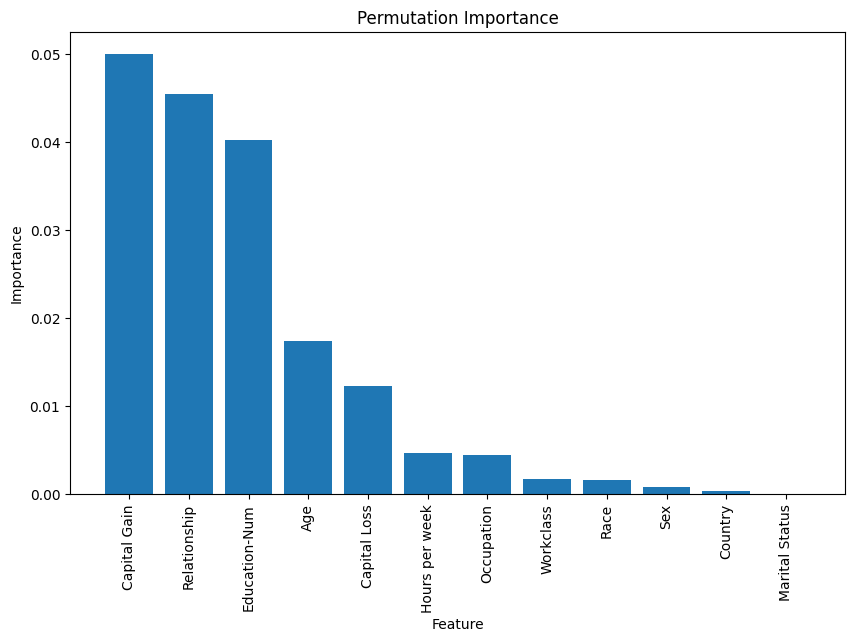

In [56]:
import matplotlib.pyplot as plt

# Get feature names
feature_names = X_test.columns

# Sort feature importances in descending order
sorted_indices = error_changes.argsort()[::-1]
sorted_importances = error_changes[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Visualize importance values with a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Permutation Importance')
plt.savefig('q4_b.png')

(c) Permutation tests are inherently stochastic because they permute features randomly. Run the permutation test from part (b) 10 times and visualize the variance in the importance values using a bar plot with standard deviation error bars.

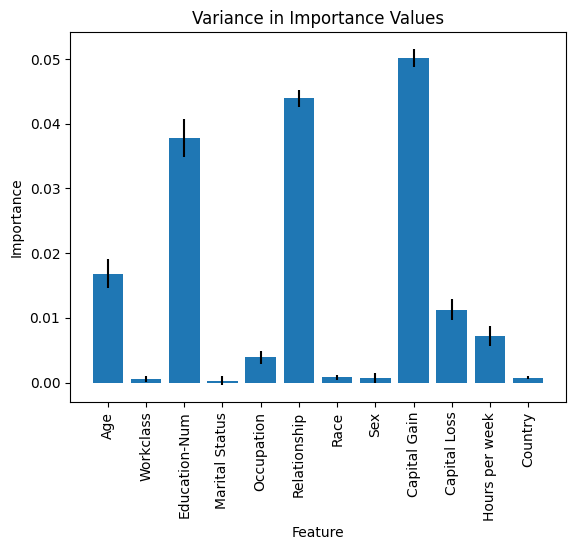

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Run permutation test 10 times and collect importance values
importance_values = []
for _ in range(10):
    error_changes = perm_test(model, X_test.values, y_test)
    importance_values.append(error_changes)

# Calculate mean and standard deviation of importance values
mean_importance = np.mean(importance_values, axis=0)
std_importance = np.std(importance_values, axis=0)

# Plot the importance values with error bars
plt.bar(feature_names, mean_importance, yerr=std_importance)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Variance in Importance Values')
plt.show()

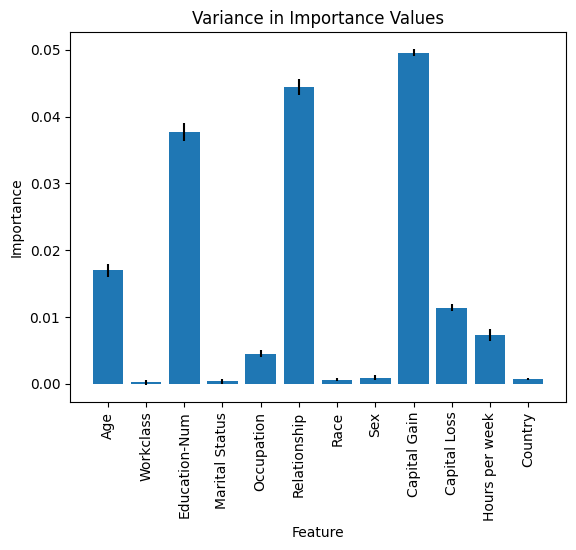

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Run permutation test 10 times and collect importance values
importance_values = []
for _ in range(10):
    result = permutation_importance(model, X_test.values, y_test)
    importance_values.append(result['importances_mean'])

# Calculate mean and standard deviation of importance values
mean_importance = np.mean(importance_values, axis=0)
std_importance = np.std(importance_values, axis=0)

# Plot the importance values with error bars
plt.bar(feature_names, mean_importance, yerr=std_importance)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Variance in Importance Values')
plt.show()
